In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import MSTL
import numpy as np
from scipy.stats import boxcox
import pandas as pd

sns.set_style("darkgrid")
sns.set_context("poster")

df = pd.read_csv("Products_Information.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.resample('D').sum()

df = df['2013':]




In [2]:
# Compute date time variables used later in plotting
df["week"] = df.index.isocalendar().week
df["day_of_month"] = df.index.day
df["month"] = df.index.month

In [3]:
mstl = MSTL(df["sales"], periods=(7, 28, 7 * 52), stl_kwargs={"seasonal_deg": 1})
res = mstl.fit()

In [4]:

res.trend.head()

date
2013-01-01    335735.575437
2013-01-02    336048.497698
2013-01-03    336361.495798
2013-01-04    336674.571159
2013-01-05    336987.725247
Freq: D, Name: trend, dtype: float64

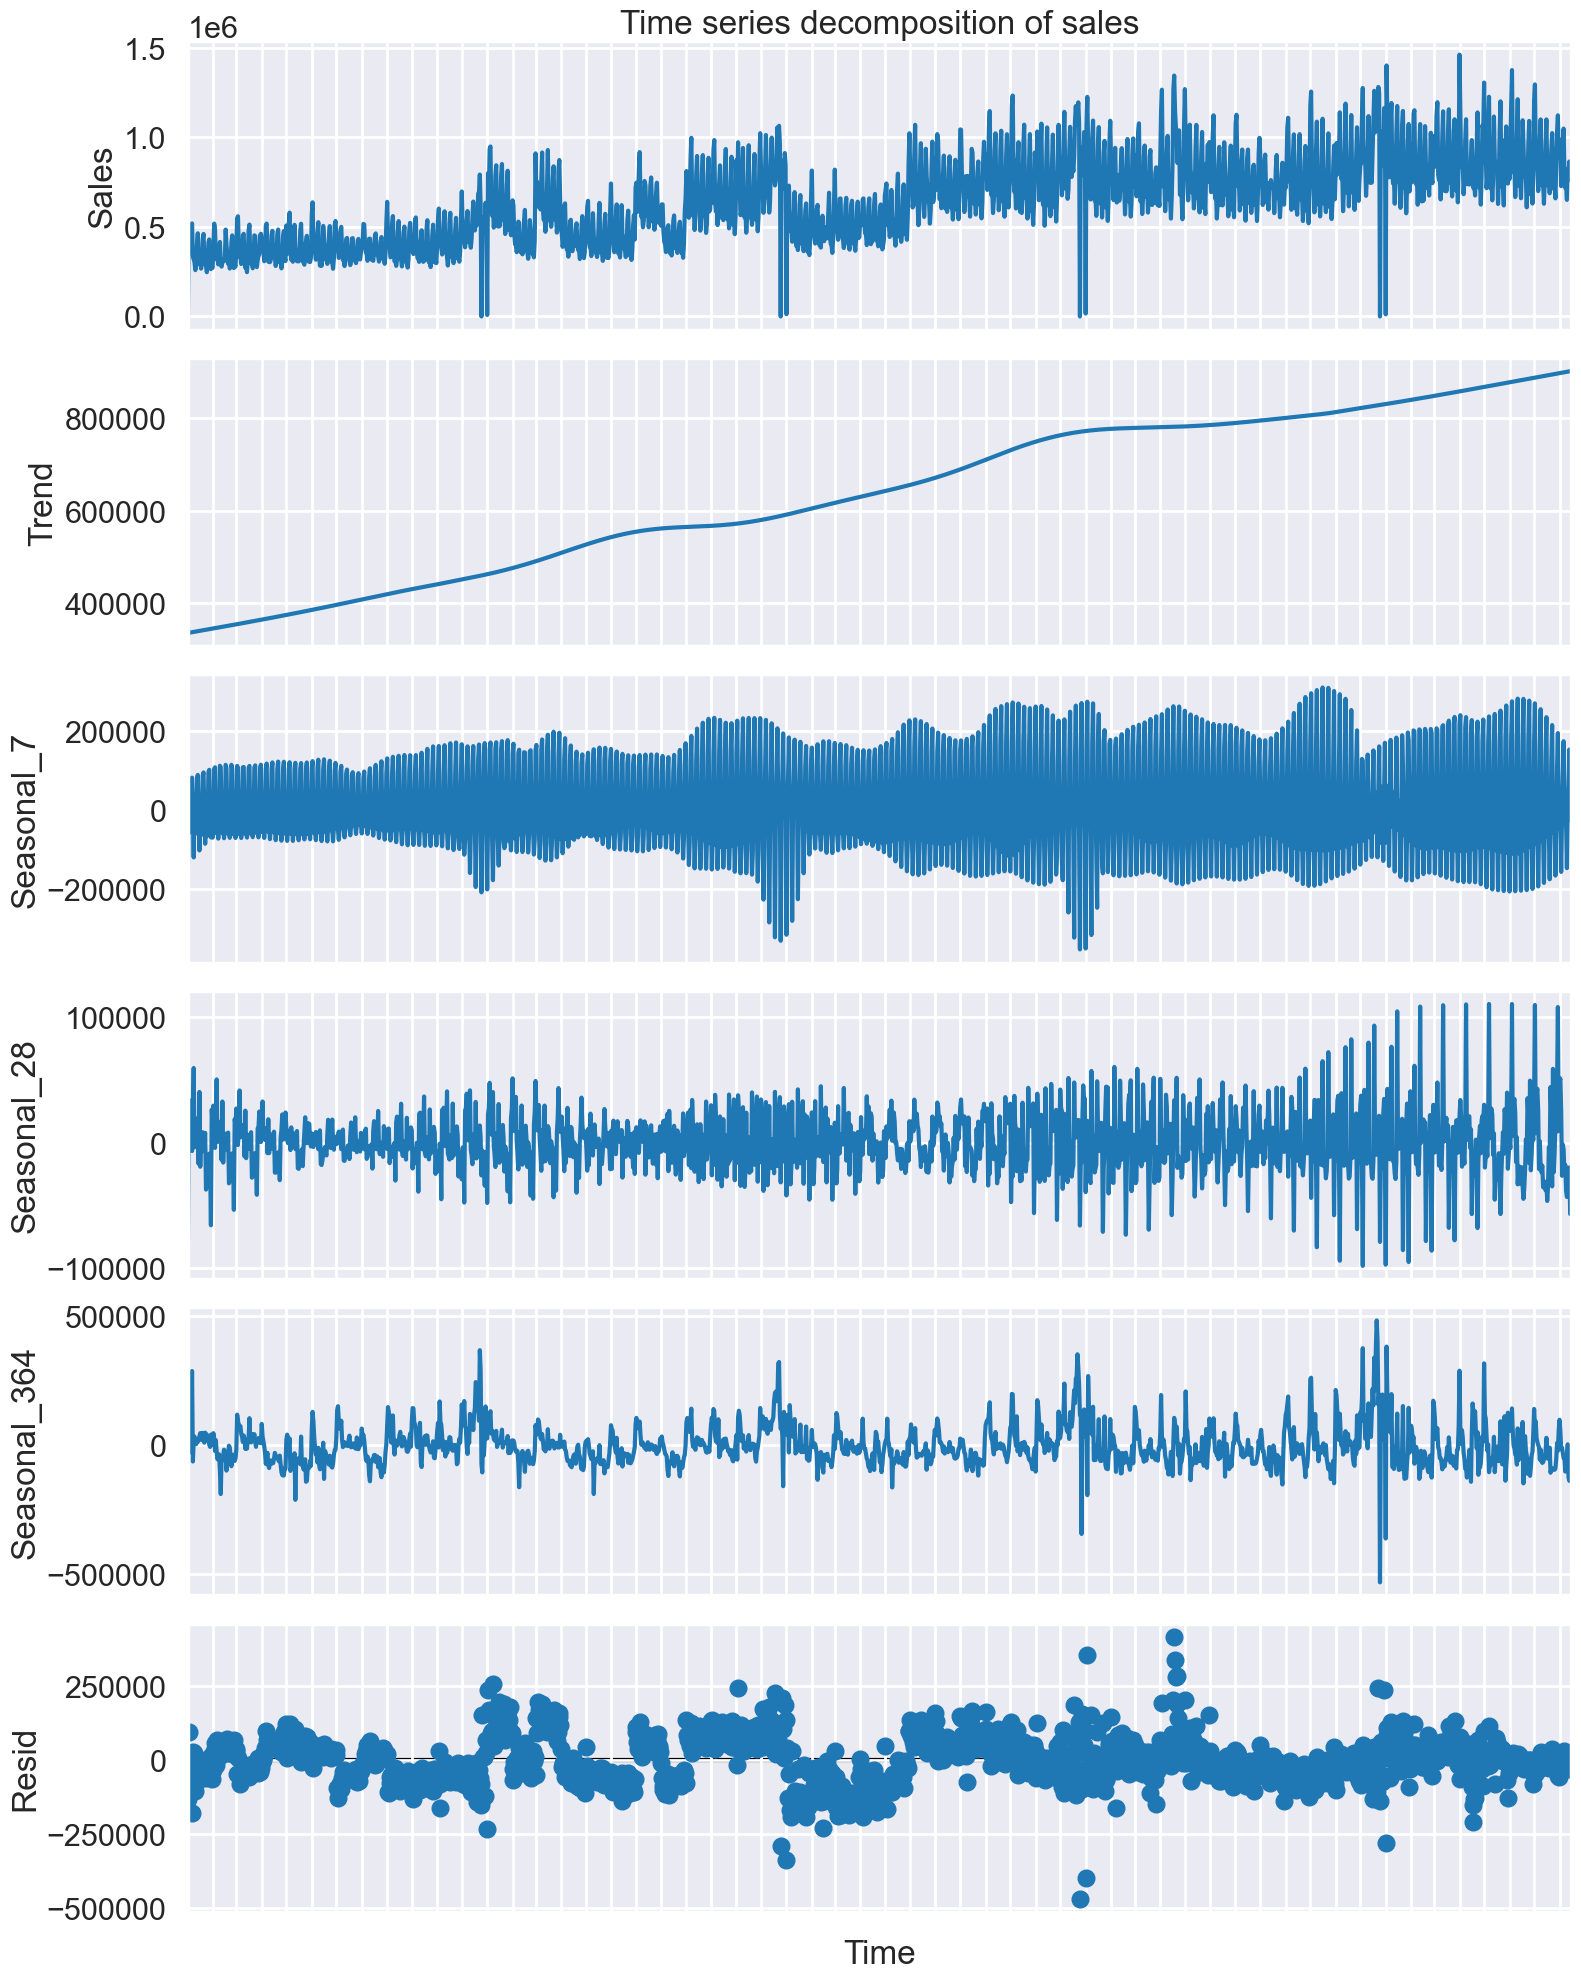

In [5]:
plt.rc("figure", figsize=(16, 20))
plt.rc("font", size=13)
fig = res.plot()

axs = fig.get_axes()

start_date = df.index.min() 
end_date = df.index.max()


ax_last = axs[-1]
ax_last.xaxis.set_ticks(pd.date_range(start=start_date, end=end_date, freq="MS"))
plt.setp(ax_last.get_xticklabels(), rotation=0, horizontalalignment="center")
for ax in axs[:-1]:
    ax.get_shared_x_axes().joined(ax, ax_last)
    ax_last.xaxis.set_ticks(pd.date_range(start=start_date, end=end_date, freq="MS"))
    ax.set_xticklabels([])
    plt.ticklabel_format(style='plain', axis='y')
axs[0].set_ylabel("Sales")
axs[0].set_title("Time series decomposition of sales")
ax_last.set_xlabel("Time")

plt.tight_layout()


plt.show()



In [6]:
print(res.seasonal.columns)


Index(['seasonal_7', 'seasonal_28', 'seasonal_364'], dtype='object')


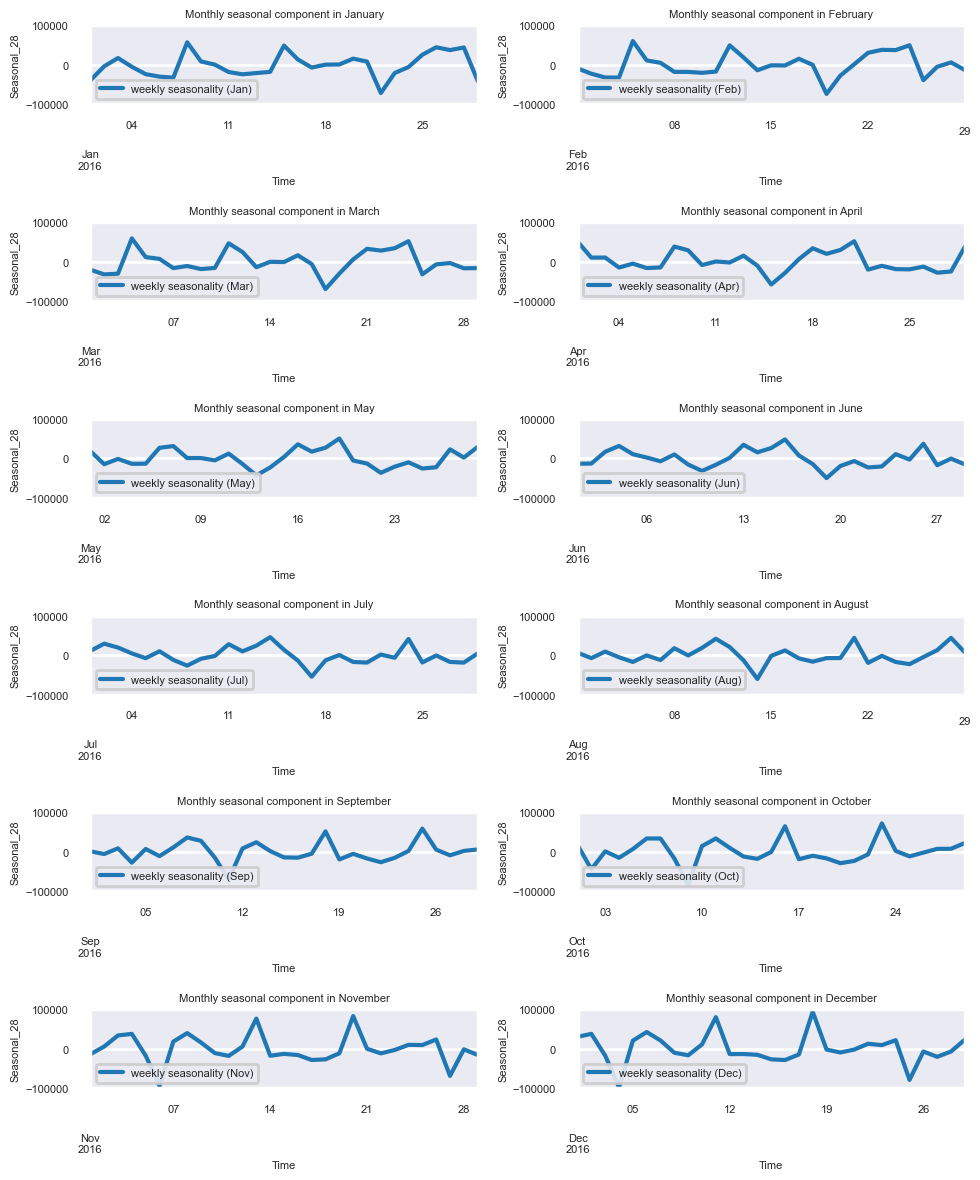

In [7]:
months = pd.date_range(start="2016-01-01", periods=12, freq='MS')  

#weekly seasonality for the current month

num_plots = len(months)
num_rows = (num_plots + 1) // 2 
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 2))

axs = axs.flatten() if num_rows > 1 else [axs]

for i, month in enumerate(months):
    start = month
    end = start + pd.Timedelta("4W")
    
    res.seasonal["seasonal_28"].loc[start:end].plot(
        ax=axs[i], label=f"weekly seasonality ({start.strftime('%b')})", legend=True
    )
    
    axs[i].set_title(f"Monthly seasonal component in {start.strftime('%B')}", fontsize=8)
    axs[i].set_xlabel("Time", fontsize=8)
    axs[i].set_ylabel("Seasonal_28", fontsize=8)
    axs[i].legend(loc="lower left", framealpha=0.9, fontsize=8)
    axs[i].tick_params(axis='both', which='both', labelsize=8) 
    axs[i].set_ylim(-100000, 100000)  


plt.tight_layout()

plt.savefig("monthly_seasonal.png")